# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
!pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 8.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import warnings

from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
!wget --no-check-certificate https://raw.githubusercontent.com/rioooranteai/data-analytics---modeling/main/Sugar%20Consumption%20Clustering%20%26%20Classificatoin/Dataset/Dataset_clustering.csv -O "/content/Dataset_clustering.csv"

--2025-04-13 06:24:09--  https://raw.githubusercontent.com/rioooranteai/data-analytics---modeling/main/Sugar%20Consumption%20Clustering%20%26%20Classificatoin/Dataset/Dataset_clustering.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3996477 (3.8M) [text/plain]
Saving to: ‘/content/Dataset_clustering.csv’

/content/Dataset_cl 100%[===================>]   3.81M  --.-KB/s    in 0.1s    

2025-04-13 06:24:09 (32.8 MB/s) - ‘/content/Dataset_clustering.csv’ saved [3996477/3996477]



In [33]:
df = pd.read_csv("/content/Dataset_clustering.csv")
df.drop_duplicates(inplace=True)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

## **Tanpa PCA**

In [16]:
df_non_pca = df.drop(columns=['PC1', 'PC2'])

In [17]:
X_non_pca, y_non_pca = df_non_pca.drop('Cluster', axis=1), df_non_pca['Cluster']

In [18]:
X_train_npca, X_test_npca, y_train_npca, y_test_npca = train_test_split(X_non_pca, y_non_pca, test_size=0.2, random_state=42)

## **Dengan PCA**

In [19]:
X, y = df.drop('Cluster', axis=1), df['Cluster']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### **Tanpa PCA**

In [21]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose= -1),
}

skf_non_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_scores_non_pca = {}

for name, model in models.items():
    scores = cross_val_score(model, X_non_pca, y_non_pca, cv=skf_non_pca, scoring='accuracy')
    model_scores_non_pca[name] = np.mean(scores)
    print(f"{name}: Accuracy = {model_scores_non_pca[name]:.4f}")

sorted_models_non_pca = sorted(model_scores_non_pca.items(), key=lambda x: x[1], reverse=True)

RandomForest: Accuracy = 1.0000
DecisionTree: Accuracy = 1.0000
XGBoost: Accuracy = 1.0000
LightGBM: Accuracy = 1.0000


### **Dengan PCA**

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    model_scores[name] = np.mean(scores)
    print(f"{name}: Accuracy = {model_scores[name]:.4f}")

sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

RandomForest: Accuracy = 1.0000
DecisionTree: Accuracy = 1.0000
XGBoost: Accuracy = 1.0000
LightGBM: Accuracy = 1.0000


### **Train Final Model**
> Setelah melihat hasil dari cross validation, ternyata tidak ada perbedaan antara menggunakan data non-pca dan dengan pca. Tapi sepertinya terjadi data leakage sehingga ada beberapa fitur yang sangat mencirikan sebuah kelas sehingga model sangat mudah untuk mengklasifikasikan setiap cluster

In [23]:
rf_final = RandomForestClassifier(random_state=42)
dt_final = DecisionTreeClassifier(random_state=42)

In [24]:
rf_final.fit(X_train_npca, y_train_npca)
dt_final.fit(X_train_npca, y_train_npca)

DecisionTreeClassifier(random_state=42)

Model-model yang saya gunakan saat ini fokusnya adalah model berbasis pohon keputusan sehingga tidak perlu untuk di preprocessing datanya terlebih dahulu. Model-model yang saya coba adalah Random Forest, Decision Tree, XGBoost, dan LightGBM. Algoritma berbasis pohon membagi data berdasarkan threshold pada tiap fitur, mereka tidak terpengaruh oleh skala fitur sehingga tidak memerlukan normalisasi atau standardisasi sebelum training. Selain itu, model berbasis pohon secara alami tahan terhadap outlier dan memiliki mekanisme seleksi fitur internal, sehingga kebutuhan untuk melakukan feature selection secara eksplisit menjadi berkurang. Ada model lain yang gagal saya coba yaitu Catboost. Model ini cukup baik berdasarkan hasil benchmark yang dipublikasikan pada laman Papers With Code. Berikut link hasilnya: https://paperswithcode.com/task/classification

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### **Prediksi Data Uji**

In [25]:
predictions_rf = rf_final.predict(X_test_npca)
predictions_dt = dt_final.predict(X_test_npca)

In [26]:
report_rf = classification_report(y_test_npca, predictions_rf)
report_dt = classification_report(y_test_npca, predictions_dt)

### **Menghitung Metrik F1 dan Akurasi serta menampilkan Confusion Matrix Random Forest**

In [27]:
accuracy_rf = accuracy_score(y_test_npca, predictions_rf)
print("Akurasi: {:.2f}".format(accuracy_rf))

macro_f1_rf = f1_score(y_test_npca, predictions_rf, average='macro')
print("Macro F1 Score: {:.2f}".format(macro_f1_rf))

Akurasi: 1.00
Macro F1 Score: 1.00


In [28]:
print(report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       1.00      1.00      1.00       512
           2       1.00      1.00      1.00       663
           3       1.00      1.00      1.00       340

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



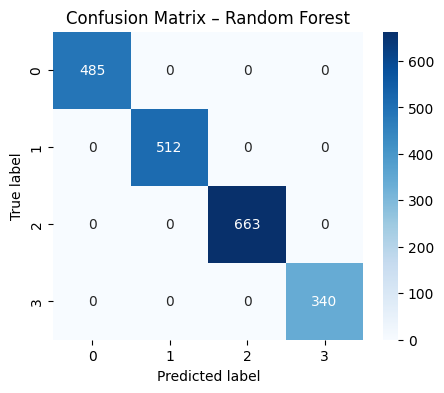

In [35]:
confusion_matrix_rf = confusion_matrix(y_test_npca, predictions_rf)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix – Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **Menghitung Metrik F1 dan Akurasi serta menampilkan Confusion Matrix Decision Tree**

In [30]:
accuracy_dt = accuracy_score(y_test_npca, predictions_dt)
print("Akurasi: {:.2f}".format(accuracy_dt))

macro_f1_dt = f1_score(y_test_npca, predictions_dt, average='macro')
print("Macro F1 Score: {:.2f}".format(macro_f1_dt))

Akurasi: 1.00
Macro F1 Score: 1.00


In [31]:
print(report_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       1.00      1.00      1.00       512
           2       1.00      1.00      1.00       663
           3       1.00      1.00      1.00       340

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



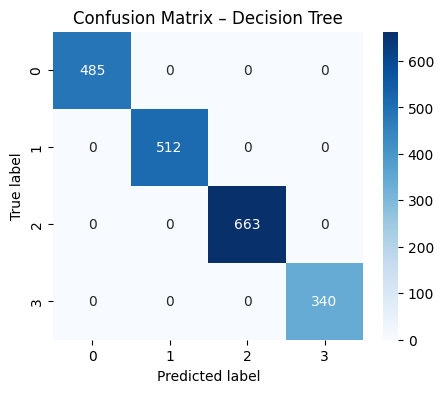

In [37]:
confusion_matrix_dt = confusion_matrix(y_test_npca, predictions_dt)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix – Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

​Berdasarkan hasil evaluasi, model Random Forest (RF) dan Decision Tree (DT) menunjukkan nilai precision, recall, dan f1-score sebesar 1.00 untuk semua kelas pada data uji. Meskipun sekilas ini tampak ideal, hasil seperti ini sering kali menandakan adanya overfitting.​ Tapi sebenarnya hal ini terjadi karena isu sebelumnya. Jadi sebenarnya masih ada masalah tapi saya masih perlu belajar lagi untuk menyelesaikan masalah ini.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Model Decision Tree dan Random Forest  menunjukkan nilai precision, recall, dan f1-score sebesar 1.00 untuk semua kelas pada data uji. Meskipun sekilas ini menunjukkan performa yang sangat baik, hasil yang terlalu sempurna seperti ini sering kali merupakan indikasi overfitting.

Hal yang mungkin bisa dicoba:
- Regularisasi dan Pruning
- Kumpulkan Data Tambahan
- Analisis Lebih Lanjut: Melakukan analisis lebih dalam terhadap fitur-fitur yang digunakan. Salah satu fokusnya adalah menyelesaikan dugaan sementara yaitu data leakage.

Selain itu, saya juga curiga kalau dataset ini bukan data aktual atau data sintesis sehingga nilai dan strukturnya memang telah disesuaikan untuk optimal dalam tugas klasifikasi